<a href="https://colab.research.google.com/github/hazrakeruboO/DS-Colabs/blob/main/Copy_of_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="green">Polynomial Regression in Python</font>

# <font color="green">Example 1</font> 


Let's look at a practical way of performing a polynomial regression.

In this example we are going to predict the salary of a candidate given the experience the candidate has. The HR of Sanford and Sons Limited, is looking to hire for a senior postion in the company. As a policy, the company has a salary distribution dataset that they use to determine how much salary to give to their employees based on their experience. As a data scientist, you are tasked creating a model that will help them with making salary predictions given  years of experience. In this case, we want to predict the amount of salary a canditate with 6 and half years of experience should get. You are provided with following dataset.

[Download Dataset](https://drive.google.com/file/d/153tLxmGZxDhVmh2o0wUP8UjFPZPmW0Ux/view?usp=sharing)

**Import Libraries**

In [ ]:
#Import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression


**Load data**

In [ ]:
# Load the dataset
dataset = pd.read_csv('position_salaries.csv')

print(dataset)

#Get the 2 and the last column from the dataset 
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
print(X)
print(y)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


**Analysis of the data**

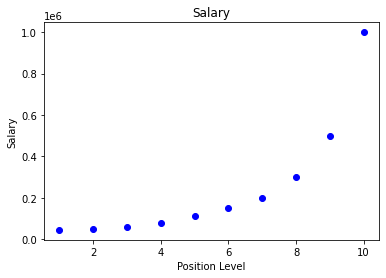

In [ ]:
# Since our dataset is pretty clean, let's start by visualizing our dataset by plotting a scatter plot

plt.scatter(X, y, color='blue') 
plt.title('Salary')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

**Observation**

From the scatter plot, the data does not appear to be linear. So if were to fit a simple linear straight line, it would not cover most of the points. Which is why applying Linear regression on this dataset would not give us the correct value.

The other alternative we are left with is applying polynomial regression.

**Manual prediction**

Before we dive into polynomial regression, let's do some manual prediction of own and then we can compare the results we get to the results we'll get after doing polynomial regression in a short while.

From our problem statement, we need to predict the salary of a candidate with 6.5 years of experience. From our dataset, we already know the salary for  candidates with 6 and 7 years of experience which is Ksh 150,000 and Ksh 200,000 respectively.This means that the salary for a candidate with 6.5 years of experience lies between this two years.Therefore, all we need to do is get the mean of this two years, right?

(150,000 + 200,000)/ 2 = KSh 175,000

From this, we can conclude that the desired salary is 175,000

Now let's do it using polynomial regression 

**Polynomial Regression**

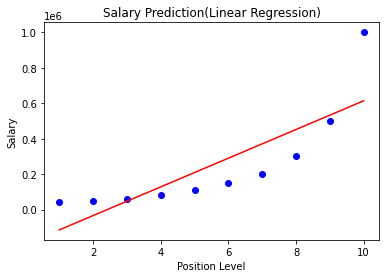

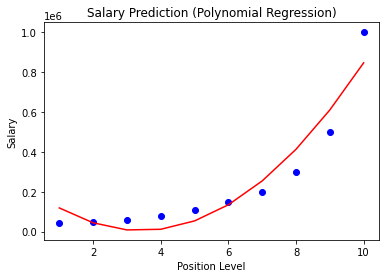

In [ ]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Salary Prediction(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Salary Prediction (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# pol_reg.predict(poly_reg.fit_transform([[5.5]]))




**Code Explanation**
 
Remember earlier on we said that a polynomial equation is written in the form;

y = b0+b1x+b2x^2.....bnx^n

Therefore,everytime we add an  nth degree of polynomial x its considered as though we are adding a feature.

So the function 


```
PolynomialFeatures(degree = 2)
```


helps us to add the degree polynomial x.For example, in our code we have specified the degree to be 2 hence the equation would look like this

y = b0+b1x+b2x^2


On the next line, we fit and transform our X independent variable into a format that has the polynomial features

Next, we apply our polynomial feature to linear regression. 



**Observation**

Looking at the two graphs, we can clearly see that the polynomial graph has given us way better results than the simple linear one.

Using the polynomial graph it becomes easier to draw meaningful conclusion from it. However, the curve is not passing through as many points as we'd want hence we can say that this graph is not fully optimized.

**Optimization in Polynomial Regression**

How do we choose an optimal model?

For us to answer this question, we need to first understand this 3 very important terms


1.   Bias
2.   Variance


**Bias**: This is the error we get due to the model's simplistic assumptions when fitting a dataset. In other words, a high bias translates to the model being unable to capture the pattern in a dataset. As a result, it leads to **under-fitting**. A perfect example is when we tried to use simple linear regression in our dataset.

**Variance**: Unlike bias, this is the error we get due to trying to fit a complex model to our data. A high variance translates to the model passing through most of the data points, leading to **over-fitting**. This is not good because the model will fail to generalise on unseen data. This means that if we subject the model to another dataset it will fail to fit the pattern . 

Therefore, for us to choose an optimal model the model needs to have a low bias and a low varinace.That is to say the model should not capture too many data points and at the same time its should not capture very few data points. 

So now let's optimize our model





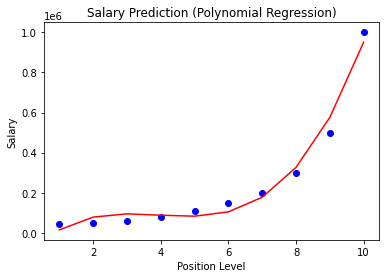

In [ ]:
# To improve on the model, all we need to do is to increase degree of the polynomial
# Let's increase the degree to 3

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 3) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Salary Prediction (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

**Observation**

When we increase the degree to 3, the curve captures slightly more data points.

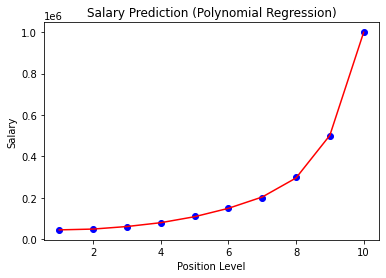

In [ ]:
# Let's improve it the model further

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 6) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Salary Prediction (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

**Observation**

When we increase the degree to 6, the model is able to capture all of the data points. This is an example of over-fitting. This model is simply too perfect which is not good for us when we using an unseen data.

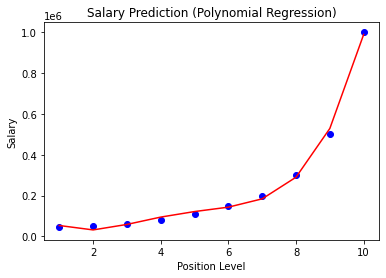

In [ ]:
# Now we know where our cap is, let's decrease the degrees slightly 

# Fit polynomial Regression to the dataset
poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly = poly_reg_4.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Salary Prediction (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

**Obsevartion**

We can conclude that this is a pretty good model because it passes just about the right amoung of points and also the  distance from the curve to the points that it does not pass through is at a minimum. Hence, we can use this model to make our predictions.

**Making Predictions**

The final step is use the model we created to make the our desired prediction.

To check how accurate polynomial regression is, we are going to predict the salary using both linear regression and polynomial regression

In [ ]:
# Predict using linear regression
lin_pred = reg_line.predict([[6.5]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg_4.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg_4.fit_transform(X))

**Conclusion**

The predicted salary using linear regression is Ksh 330,379. This is not accepteable because it falls out of the range Ksh 150,000 and 200,000.

On the other hand,the predicted salary using polynomial regression is Ksh 158,862

# <font color="green">Challenges</font>


In [ ]:
# Challenge 1
# You are given a dataset that contains the prices and other attributes of diamonds. The dataset has 9 columns: Carat, color, cut, clarity, depth, table, price, x, y, z.
# carat: Carat weight of the diamond
# cut: Describes cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal
# color: Color of the diamond, with D being the best and J the worst
# clarity: How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
# depth % :The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
# table %: The width of the diamond's table expressed as a percentage of its average diameter
# price: The price of the diamond
# x: length mm
# y: width mm
# z: depth mm
# Your task is to predict the prices of diamonds given carat weight
# Here is the dataset: https://drive.google.com/file/d/1lSgupNhVwXzR9aXbz2G0VwKQGEpx6pFl/view?usp=sharing

df=pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
X=df['carat'].copy()
y=df['price'].copy()
#poly=PolynomialFeatures(degrees=5)
#X_poly=

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
X_train

15566    1.03
42852    0.41
4206     0.80
11754    1.01
52893    0.70
         ... 
5520     1.00
35814    0.31
20463    1.60
18638    1.46
35683    0.41
Name: carat, Length: 43152, dtype: float64

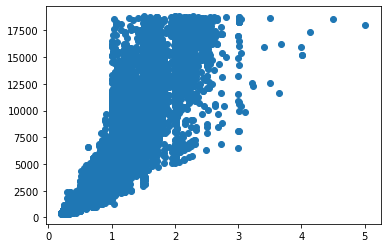

In [ ]:
plt.scatter(X,y)

In [ ]:
#the relationship is simillar to an exponential function
poly_reg_5 = PolynomialFeatures(degree = 2) 
X_poly_5=poly_reg_5.fit_transform(X_train.values.reshape(-1,1))
X_test_poly=poly_reg_5.transform(X_test.values.reshape(-1,1))

In [ ]:
poly_reg_5=LinearRegression()
poly_reg_5.fit(X_poly_5, y_train.values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

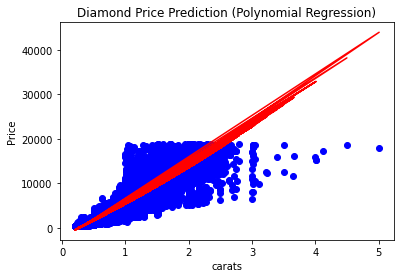

In [ ]:
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X_train, poly_reg_5.predict(X_poly_5), color='red')
plt.title('Diamond Price Prediction (Polynomial Regression)')
plt.xlabel('carats')
plt.ylabel('Price')
plt.show()

In [ ]:
y_predict=poly_reg_5.predict(X_test_poly)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_predict))
# mean squared error
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_predict))
#root mean squared error
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error:  958.9902494399931
Mean Squared Error:  2366807.5132435965
Root Mean Squared Error:  1538.4432109257712


In [ ]:
# Challenge 2
# The dataset for this challenge represents the physicochemical tests of wine and the quality of wine as a result of these physicochemical tests. Here's a brief description of the columns
# volatile acidity: The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
# citric acid: Found in small quantities, citric acid can add 'freshness' and flavor to wines
# residual sugar: The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
# chlorides: The amount of salt in the wine
# free sulfur dioxide: The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
# total sulfur dioxide: Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
# density: The density of water is close to that of water depending on the percent alcohol and sugar content
# pH: Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
# sulphates: A wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
# alcohol: The percent alcohol content of the wine
# quality: Output variable (based on sensory data, score between 0 and 10)

# Here is a link to the dataset: https://drive.google.com/open?id=1cctsp46KVzNKGAK0kLl3mY6wRTDlUBp4

# Use polynomial regression to predict quality of wine using the physiochemical tests

# Hint:Try to get how well your model has been fitted using RMSE without necessarily plotting a graph

df=pd.read_csv('https://drive.google.com/open?id=1cctsp46KVzNKGAK0kLl3mY6wRTDlUBp4')

NameError: ignored